In [3]:
import numpy as np
import pandas as pd
from quasinet.qnet import qdistance, load_qnet
from emergenet.domseq import DomSeq, save_model, load_model
import os
import glob

In [22]:
Q_PATH='../../paper_data_v2//irat_enet/enet_models/current_enets/h1n1_ha.joblib.gz'
qnet__=load_qnet(Q_PATH,gz=True)

In [23]:
import multiprocessing as mulpro
import itertools
import shap

In [24]:
df=pd.read_csv('../../paper_data_v2/irat_enet/results/animal_predictions/combined_results.csv')

In [25]:
df_=df[df.subtype=='H1N1'][['ha_accession','ha','emergence_risk']].set_index('ha_accession').sort_values('emergence_risk')
low_risk_seq=df_[df_.emergence_risk<6].ha.values
high_risk_seq=df_[df_.emergence_risk>6.5].ha.values

S0=[np.array(list(x)) for x in low_risk_seq]
slow=pd.DataFrame(S0).mode().values[0]
shigh=np.array([np.array(list(x)) for x in high_risk_seq])

In [26]:
s0__=slow
def fpar(s):
    return qdistance(s0__,s,qnet__,qnet__)
def f(s_array):
    pool = mulpro.Pool(processes=10)
    return np.array(pool.map(fpar, s_array))    

In [27]:
explainer = shap.KernelExplainer(f,np.array([slow]))

In [28]:
S_=np.array([x for x in shigh if np.random.rand()<.2 ])
shap_values = explainer.shap_values(S_, nsamples=550)

  0%|          | 0/51 [00:00<?, ?it/s]

In [29]:
shp1=pd.DataFrame(pd.DataFrame(shap_values).abs().mean().sort_values(ascending=False),columns=['shp_h1n1'])
shp1.index.name='H1N1_features'

In [30]:
Q_PATH='../../paper_data_v2//irat_enet/enet_models/current_enets/h3n2_ha.joblib.gz'
qnet__=load_qnet(Q_PATH,gz=True)


In [31]:
df_=df[df.subtype=='H3N2'][['ha_accession','ha','emergence_risk']].set_index('ha_accession').sort_values('emergence_risk')
low_risk_seq=df_[df_.emergence_risk<6].ha.values
high_risk_seq=df_[df_.emergence_risk>6.5].ha.values

S0=[np.array(list(x)) for x in low_risk_seq]
slow=pd.DataFrame(S0).mode().values[0]
shigh=np.array([np.array(list(x)) for x in high_risk_seq])

In [32]:
s0__=slow
def fpar(s):
    return qdistance(s0__,s,qnet__,qnet__)
def f(s_array):
    pool = mulpro.Pool(processes=10)
    return np.array(pool.map(fpar, s_array))    

In [33]:
explainer = shap.KernelExplainer(f,np.array([slow]))

In [34]:
S_=np.array([x for x in shigh if np.random.rand()<.2 ])
shap_values = explainer.shap_values(S_, nsamples=550)

  0%|          | 0/38 [00:00<?, ?it/s]

In [35]:
shp2=pd.DataFrame(pd.DataFrame(shap_values).abs().mean().sort_values(ascending=False),columns=['shp_h3n2'])
shp2.index.name='H3N2_features'

In [36]:
shp1.to_csv('lowhighrisk_H1N1.csv')
shp2.to_csv('lowhighrisk_H3N2.csv')


<AxesSubplot:xlabel='H1N1_features'>

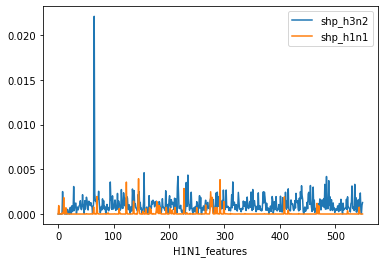

In [40]:
ax=shp2.sort_index().ewm(alpha=.95).mean().plot(logy=False)
shp1.sort_index().ewm(alpha=.95).mean().plot(logy=False,ax=ax)


In [10]:
shp1=pd.read_csv('lowhighrisk_H1N1.csv',index_col=0)
shp2=pd.read_csv('lowhighrisk_H3N2.csv',index_col=0)


In [11]:
shp1.head(10)

,shp_h1n1
H1N1_features,
145,0.004103
292,0.004045
123,0.003762
227,0.003003
275,0.002602
70,0.002059
408,0.002023
10,0.001941
278,0.001920


<AxesSubplot:xlabel='H1N1_features'>

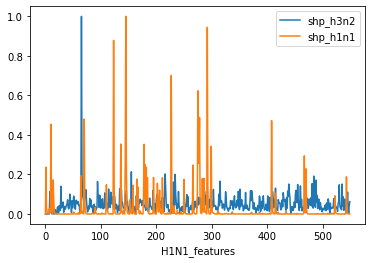

In [34]:
s1=shp1.sort_index().ewm(alpha=.85).mean()
s1=s1/s1.max()
s2=shp2.sort_index().ewm(alpha=.85).mean()
s2=s2/s2.max()
ax=s2.plot(logy=False)
#ax.set_ylim(0,0.005)
s1.plot(logy=False,ax=ax)


In [78]:
s1

,shp_h1n1
H1N1_features,
0,0.000000
1,0.237298
2,0.034912
3,0.011454
4,0.001717
...,...
545,0.004228
546,0.000634
547,0.000095


In [70]:
s2[s2>0.05].dropna().index.values

array([  8,  28,  31,  32,  39,  40,  44,  45,  46,  48,  50,  51,  52,
        55,  56,  57,  58,  59,  64,  65,  66,  67,  68,  69,  71,  72,
        73,  74,  80,  82,  94,  95,  96,  98, 102, 103, 107, 109, 110,
       114, 115, 118, 119, 120, 121, 122, 124, 125, 134, 135, 137, 138,
       139, 144, 145, 146, 148, 154, 155, 164, 169, 170, 171, 172, 173,
       175, 176, 177, 182, 183, 188, 194, 195, 198, 200, 201, 202, 204,
       205, 206, 207, 210, 212, 213, 215, 216, 217, 227, 231, 232, 234,
       235, 236, 238, 240, 250, 254, 255, 257, 266, 269, 270, 274, 275,
       277, 278, 279, 280, 284, 285, 287, 288, 290, 291, 294, 296, 298,
       299, 300, 303, 313, 315, 316, 317, 318, 321, 325, 326, 334, 337,
       340, 341, 345, 346, 348, 351, 353, 354, 355, 361, 369, 370, 371,
       372, 373, 374, 376, 386, 387, 390, 393, 401, 405, 407, 410, 411,
       413, 415, 420, 421, 422, 423, 427, 429, 430, 431, 432, 435, 437,
       438, 439, 440, 441, 449, 451, 452, 453, 454, 455, 456, 45

In [82]:
' '.join(s1[s1>0.05].dropna().index.values.astype(str))

'1 10 11 14 15 64 70 71 110 123 124 136 137 144 145 146 153 158 165 167 177 178 179 180 182 184 195 202 203 205 206 211 227 228 250 266 274 275 276 277 278 279 283 286 287 292 293 299 300 408 409 415 467 470 522 543'

In [81]:
' '.join(s1[s1.shp_h1n1.between(0.01,0.05)].dropna().index.values.astype(str))

'2 3 7 12 16 65 67 72 90 111 112 125 141 147 154 155 159 166 168 171 181 183 185 196 201 204 207 212 229 232 238 244 251 267 280 284 285 294 311 337 410 416 434 468 471 523 544'

In [43]:
! ls *SHAP*csv


'A:American wigeon:South Carolina:AH0195145:2021_ha_SHAP.csv'
 A:Anhui-Lujiang:39:2018_ha_SHAP.csv
 A:Astrakhan:3212:2020_ha_SHAP.csv
 A:California:62:2018_ha_SHAP.csv
 A:canine:Illinois:12191:2015_ha_SHAP.csv
 A:chicken:Tennessee:17-007147-2:2017_ha_SHAP.csv
 A:chicken:Tennessee:17-007431-3:2017_ha_SHAP.csv
 A:gyrfalcon:Washington:41088:2014_ha_SHAP.csv
 A:Indiana:08:2011_ha_SHAP.csv
 A:Netherlands:219:2003_ha_SHAP.csv
 A:Ohio:13:2017_ha_SHAP.csv
 A:Shanghai:02:2013_ha_SHAP.csv
 A:Sichuan:06681:2021_ha_SHAP.csv
 A:swine:Shandong:1207:2016_ha_SHAP.csv
 A:turkey:Indiana:1573-2:2016_ha_SHAP.csv
 A:Vietnam:1203:2004_ha_SHAP.csv
 A:Yunnan:14564:2015_ha_SHAP.csv
 north_h1n1_ha_SHAP.csv
 north_h3n2_ha_SHAP.csv
 south_h1n1_ha_SHAP.csv
 south_h3n2_ha_SHAP.csv


In [60]:
sf_n_h1n1=pd.read_csv('north_h1n1_ha_SHAP.csv',index_col=0)
sf_n_h1n1=sf_n_h1n1.sort_index().ewm(alpha=.85).mean()
sf_n_h1n1=sf_n_h1n1/sf_n_h1n1.max()
sf_n_h1n1[sf_n_h1n1>0.03].dropna().index.values

array([ 70, 141, 153, 155, 182, 184, 187, 202, 203, 222, 223, 227, 231,
       238, 265, 299, 408])

<AxesSubplot:xlabel='features'>

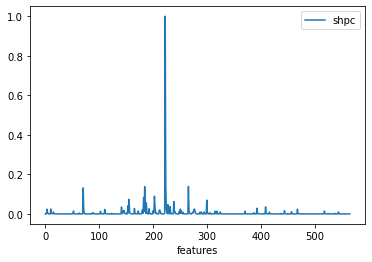

In [64]:
sf_n_h1n1.plot()

In [66]:
sf_s_h1n1=pd.read_csv('south_h1n1_ha_SHAP.csv',index_col=0)
sf_s_h1n1=sf_s_h1n1.sort_index().ewm(alpha=.85).mean()
sf_s_h1n1=sf_s_h1n1/sf_s_h1n1.max()
sf_s_h1n1[sf_s_h1n1>0.03].dropna().index.values

array([  7,  70,  71, 110, 136, 146, 147, 165, 177, 178, 202, 203, 225,
       232, 240, 266, 415, 522, 523])

<AxesSubplot:xlabel='features'>

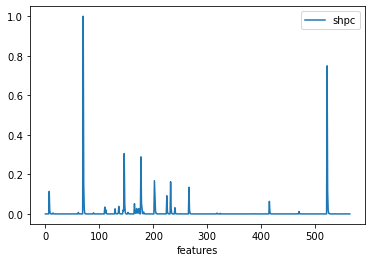

In [67]:
sf_s_h1n1.plot()